# Bussiness Case

The business problem is predicting customer retention potential in the retail industry to reduce customer churn and increase profitability. By identifying customers at risk of churning, targeted offers, promotions, and personalized services can be provided to improve customer experience and reduce churn rate. Segmenting customers based on their retention potential helps identify specific needs and behaviors to develop tailored marketing and engagement strategies, resulting in increased sales and profitability.

# ML Problem Statement

The business problem of customer retention is converted into a machine learning problem by using historical data about customers' transactions, interactions, and preferences to predict their retention potential level as high/medium/low. This is done using a predictive model trained on the historical data, which can then be used to predict the retention potential of new customers. The model can help the business to target its marketing programs more effectively by directing them towards customers who are likely to be retained or have a high probability of retention. This can result in increased customer engagement, sales, and profitability for the business.



# Dataset Discription


# Overview:

The datasets have different numbers of rows and columns, but they are all related to customer transactions, email interactions, and profile information. They can be merged using the common Customer ID column to obtain a more comprehensive dataset for analysis and model building.

Some important parameters that may be useful for analysis and model building include the date of order, quantity, price, email type, and customer profile information such as city, date of registration, and language preference. Additionally, the target attribute (RetentionPotential) is a crucial parameter for building a predictive model to segment customers based on their likelihood to churn.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Train_Datasets

In [3]:
TrainData1 = pd.read_excel('Customerdata_Train.xlsx')
TrainData2 = pd.read_excel('Emaildata_Train.xlsx')
TrainData3 = pd.read_excel('transactionsdata_Train.xlsx')
Target = pd.read_excel('Train.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Customerdata_Train.xlsx'

# Converting Excel to CSV Files

In [4]:
TrainData1.to_csv('Customerdata_Train.csv', index=False)
TrainData2.to_csv('Emaildata_Train.csv', index=False)
TrainData3.to_csv('transactionsdata_Train.csv', index=False)
Target.to_csv('Train.csv', index=False)

# Train_Data_1

In [5]:
TrainData1.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [6]:
TrainData1.shape

(23820, 7)

In [7]:
TrainData1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


# Target Data

In [8]:
Target.shape

(23820, 2)

In [9]:
Target.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [10]:
Target.columns

Index(['CustomerID', 'RetentionPotential'], dtype='object')

# Train_Data_2

In [11]:
TrainData2.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [12]:
TrainData2.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [13]:
TrainData2.drop(['DateOfemail','timestamp'],axis=1,inplace=True)

In [14]:
TrainData2.head()

,CustomerID,EmailType,MailOpened,MailClicked
0,C16368,WelcomeEmail,yes,NotApplicable
1,C20345,WelcomeEmail,yes,NotApplicable
2,C17683,WelcomeEmail,yes,NotApplicable
3,C18647,WelcomeEmail,yes,NotApplicable
4,C36692,WelcomeEmail,yes,NotApplicable


In [15]:
TrainData2.drop_duplicates(keep='first',inplace=True)

In [16]:
TrainData2.shape

(57829, 4)

In [17]:
TrainData2['EmailType'].value_counts()

CustomizedEmail    34009
WelcomeEmail       23820
Name: EmailType, dtype: int64

In [18]:
TrainData2['MailOpened'].value_counts()

yes    43883
no     13946
Name: MailOpened, dtype: int64

In [19]:
TrainData2['MailClicked'].value_counts()

no               25373
NotApplicable    23820
yes               8636
Name: MailClicked, dtype: int64

# Checking CustomerID & EmailType

In [20]:
TrainData2_new1=TrainData2[['CustomerID','EmailType']]
TrainData2_new1.head()

,CustomerID,EmailType
0,C16368,WelcomeEmail
1,C20345,WelcomeEmail
2,C17683,WelcomeEmail
3,C18647,WelcomeEmail
4,C36692,WelcomeEmail


In [21]:
TrainData2_new1.shape

(57829, 2)

In [22]:
TrainData2_new1.drop_duplicates(keep='first',inplace=True)

In [23]:
TrainData2_new1.shape

(37931, 2)

In [24]:
TrainData2_new1.drop('EmailType',axis=1,inplace=True)

In [25]:
# Count the number of repeated customers and add a new column
TrainData2_new1['No_of_mails_received']=TrainData2_new1.groupby(by='CustomerID',as_index=False)['CustomerID'].count()

In [26]:
TrainData2_new1.head()

,CustomerID,No_of_mails_received
0,C16368,2.0
1,C20345,1.0
2,C17683,1.0
3,C18647,2.0
4,C36692,1.0


In [27]:
TrainData2_new1.shape

(37931, 2)

In [28]:
TrainData2_new1.isnull().sum()

CustomerID                  0
No_of_mails_received    14111
dtype: int64

In [29]:
37931-14111

23820

In [30]:
TrainData2_new1.dropna(inplace=True)

In [31]:
TrainData2_new1.isnull().sum()

CustomerID              0
No_of_mails_received    0
dtype: int64

In [32]:
TrainData2_new1.shape

(23820, 2)

In [33]:
TrainData2_new1.head()

,CustomerID,No_of_mails_received
0,C16368,2.0
1,C20345,1.0
2,C17683,1.0
3,C18647,2.0
4,C36692,1.0


In [34]:
TrainData2_new1[TrainData2_new1['CustomerID']=='C16368']

,CustomerID,No_of_mails_received
0,C16368,2.0


# Checking CustomerID & MailClicked

In [35]:
TrainData2_new2=TrainData2[['CustomerID','MailClicked']]
TrainData2_new2.head()

,CustomerID,MailClicked
0,C16368,NotApplicable
1,C20345,NotApplicable
2,C17683,NotApplicable
3,C18647,NotApplicable
4,C36692,NotApplicable


In [36]:
TrainData2_new2['MailClicked'].value_counts()

no               25373
NotApplicable    23820
yes               8636
Name: MailClicked, dtype: int64

In [37]:
count_mailclicked = lambda x: (x == 'yes').sum()

# Add a new column with the count of MailClicked 'Yes' for each CustomerID using groupby and transform with the lambda function
TrainData2_new2['No_of_times_mail_clicked'] = TrainData2_new2.groupby('CustomerID')['MailClicked'].transform(count_mailclicked)


In [38]:
TrainData2_new2.head()

,CustomerID,MailClicked,No_of_times_mail_clicked
0,C16368,NotApplicable,1
1,C20345,NotApplicable,1
2,C17683,NotApplicable,0
3,C18647,NotApplicable,1
4,C36692,NotApplicable,1


In [39]:
TrainData2_new2[TrainData2_new2['CustomerID']=='C17683']

,CustomerID,MailClicked,No_of_times_mail_clicked
2,C17683,NotApplicable,0


In [40]:
TrainData2_new2.drop('MailClicked',axis=1,inplace=True)

In [41]:
TrainData2_new2.drop_duplicates(keep='first',inplace=True)

In [42]:
TrainData2_new2.head()

,CustomerID,No_of_times_mail_clicked
0,C16368,1
1,C20345,1
2,C17683,0
3,C18647,1
4,C36692,1


In [43]:
TrainData2_new2.isnull().sum()

CustomerID                  0
No_of_times_mail_clicked    0
dtype: int64

In [44]:
TrainData2_new2.shape

(23820, 2)

# Checking CustomerID & MailOpened

In [45]:
TrainData2_new3=TrainData2[['CustomerID','MailOpened']]
TrainData2_new3.head()

,CustomerID,MailOpened
0,C16368,yes
1,C20345,yes
2,C17683,yes
3,C18647,yes
4,C36692,yes


In [46]:
TrainData2_new3['MailOpened'].value_counts()

yes    43883
no     13946
Name: MailOpened, dtype: int64

In [47]:
TrainData2_new3.shape

(57829, 2)

In [48]:
TrainData2_new3.isnull().sum()

CustomerID    0
MailOpened    0
dtype: int64

In [49]:

count_MailOpened = lambda x: (x == 'yes').sum()

#Add a new column with the count of MailOpened 'Yes' for each CustomerID using groupby and transform with the lambda function
TrainData2_new3['No_of_times_mail_opened'] = TrainData2_new3.groupby('CustomerID')['MailOpened'].transform(count_MailOpened)


In [50]:
TrainData2_new3.head()

,CustomerID,MailOpened,No_of_times_mail_opened
0,C16368,yes,3
1,C20345,yes,3
2,C17683,yes,1
3,C18647,yes,3
4,C36692,yes,3


In [51]:
TrainData2_new3.shape

(57829, 3)

In [52]:
TrainData2_new3[TrainData2_new3['CustomerID']=='C17683']

,CustomerID,MailOpened,No_of_times_mail_opened
2,C17683,yes,1


In [53]:
TrainData2_new3.drop('MailOpened',axis=1,inplace=True)

In [54]:
TrainData2_new3.drop_duplicates(keep='first',inplace=True)

In [55]:
TrainData2_new3.head()

,CustomerID,No_of_times_mail_opened
0,C16368,3
1,C20345,3
2,C17683,1
3,C18647,3
4,C36692,3


In [56]:
TrainData2_new3.value_counts()

CustomerID  No_of_times_mail_opened
C12116      3                          1
C32156      1                          1
C32168      1                          1
C32167      1                          1
C32166      1                          1
                                      ..
C22202      1                          1
C22201      1                          1
C22200      3                          1
C22197      1                          1
C42189      2                          1
Length: 23820, dtype: int64

In [57]:
TrainData2_new3.isnull().sum()

CustomerID                 0
No_of_times_mail_opened    0
dtype: int64

In [58]:
TrainData2_new3.shape

(23820, 2)

# Merged all the Sub_TrainData2


In [59]:
TrainData2_merged1 = pd.merge(TrainData2_new1, TrainData2_new2, on='CustomerID', how='inner')

In [60]:
TrainData2_merged = pd.merge(TrainData2_merged1, TrainData2_new3, on='CustomerID', how='inner')

In [61]:
TrainData2_merged.head()

,CustomerID,No_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened
0,C16368,2.0,1,3
1,C20345,1.0,1,3
2,C17683,1.0,0,1
3,C18647,2.0,1,3
4,C36692,1.0,1,3


In [62]:
TrainData2_merged.shape

(23820, 4)

# Train_Data_3

In [63]:
TrainData3.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [64]:
TrainData3.drop(['DateOfOrder','timestamp'],axis=1,inplace=True)

In [65]:
TrainData3.head()

,CustomerID,OrderQuantity
0,C16368,15
1,C20345,92
2,C20345,95
3,C20345,74
4,C20345,81


In [66]:
TrainData3.drop_duplicates(keep='first',inplace=True)

In [67]:
TrainData3.shape

(74483, 2)

In [68]:
TrainData3['OrderQuantity'].value_counts()

41     4325
40     1483
51     1301
52     1198
53     1086
       ... 
503       1
550       1
518       1
561       1
531       1
Name: OrderQuantity, Length: 451, dtype: int64

In [69]:
TrainData3_new=TrainData3.groupby(["CustomerID"]).agg({'OrderQuantity': ["sum","count"]}).reset_index()
TrainData3_new.columns = ['_'.join(col) for col in TrainData3_new.columns.values]

*Here,This code groups the TrainData3 dataframe by the CustomerID column and then aggregates the OrderQuantity column by taking the sum and count for each group. It then creates a new dataframe with the results of the aggregation.*

In [70]:
TrainData3_new.rename(columns={"CustomerID_":"CustomerID"},inplace=True)

In [71]:
TrainData3_new

,CustomerID,OrderQuantity_sum,OrderQuantity_count
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1
...,...,...,...
23815,C42185,1029,10
23816,C42186,46,1
23817,C42187,41,1
23818,C42188,51,1


In [72]:
TrainData3_new.shape

(23820, 3)

# Final Merge

In [73]:
Final_TrainData=TrainData1.merge(TrainData2_merged,on="CustomerID",how="left").merge(TrainData3_new,on="CustomerID",how="left").merge(Target,on="CustomerID",how="left")

In [74]:
Final_TrainData

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,No_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2.0,1,3,15,1,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,1.0,1,3,3588,43,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,1.0,0,1,309,9,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2.0,1,3,748,7,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,1.0,1,3,1380,20,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,2.0,0,1,41,1,Low
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,1.0,0,1,56,1,Low
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,1.0,0,1,35,1,Low
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,1.0,1,3,100,2,Low


In [75]:
Final_TrainData.shape

(23820, 13)

# Data Pre-Processing

In [76]:
Final_TrainData.dtypes

CustomerID                          object
City                                object
DateOfRegistration          datetime64[ns]
OnlineCommunication                  int64
AutomaticRefill                      int64
DoorstepDelivery                     int64
PreferredDeliveryDay                object
No_of_mails_received               float64
No_of_times_mail_clicked             int64
No_of_times_mail_opened              int64
OrderQuantity_sum                    int64
OrderQuantity_count                  int64
RetentionPotential                  object
dtype: object

In [77]:
Final_TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                23820 non-null  object        
 1   City                      23820 non-null  object        
 2   DateOfRegistration        23820 non-null  datetime64[ns]
 3   OnlineCommunication       23820 non-null  int64         
 4   AutomaticRefill           23820 non-null  int64         
 5   DoorstepDelivery          23820 non-null  int64         
 6   PreferredDeliveryDay      23820 non-null  object        
 7   No_of_mails_received      23820 non-null  float64       
 8   No_of_times_mail_clicked  23820 non-null  int64         
 9   No_of_times_mail_opened   23820 non-null  int64         
 10  OrderQuantity_sum         23820 non-null  int64         
 11  OrderQuantity_count       23820 non-null  int64         
 12  RetentionPotential

In [78]:
Final_TrainData.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,No_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count
count,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615,1.592401,0.362552,1.842275,246.572124,3.126910
std,0.473580,0.292821,0.190268,0.491398,0.480747,0.891400,649.594358,5.358179
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,41.000000,1.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,64.000000,1.000000
75%,1.000000,0.000000,0.000000,2.000000,1.000000,3.000000,163.000000,2.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,16658.000000,66.000000


In [79]:
# identify duplicate records
duplicate_rows =Final_TrainData.duplicated()
# count number of duplicate records
print("Number of duplicate records:", duplicate_rows.sum())

Number of duplicate records: 0


In [80]:
print(Final_TrainData.isna().sum())

CustomerID                  0
City                        0
DateOfRegistration          0
OnlineCommunication         0
AutomaticRefill             0
DoorstepDelivery            0
PreferredDeliveryDay        0
No_of_mails_received        0
No_of_times_mail_clicked    0
No_of_times_mail_opened     0
OrderQuantity_sum           0
OrderQuantity_count         0
RetentionPotential          0
dtype: int64


# Detecting & Replacing the Outliers

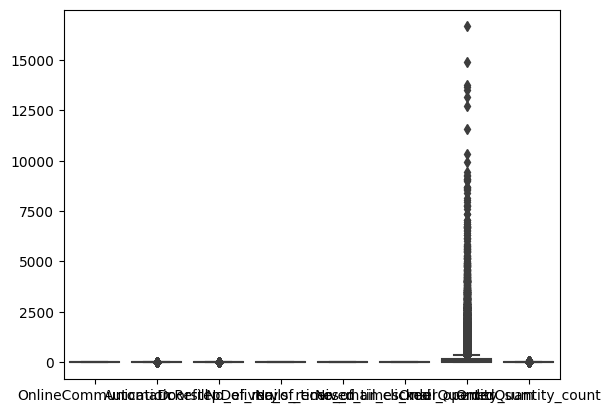

OnlineCommunication            0
AutomaticRefill             2256
DoorstepDelivery             896
No_of_mails_received           0
No_of_times_mail_clicked       0
No_of_times_mail_opened        0
OrderQuantity_sum            451
OrderQuantity_count          656
dtype: int64


In [81]:
# Plot boxplots of all numerical variables to identify outliers
sns.boxplot(data=Final_TrainData.select_dtypes(include=['float64', 'int64']))
plt.show()

# Calculate z-scores for all numerical variables
z_scores =Final_TrainData.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

In [82]:
# Define a list of columns to handle outliers
cols = ['AutomaticRefill','DoorstepDelivery','OrderQuantity_sum','OrderQuantity_count']

In [83]:
# Define a function to replace outliers with the median value
def replace_outliers(Final_TrainData, col):
    # Calculate the first and third quartiles and interquartile range (IQR)
    q1 = Final_TrainData[col].quantile(0.25)
    q3 = Final_TrainData[col].quantile(0.75)
    iqr = q3 - q1
    # Calculate the lower and upper tails
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    # Find outliers and replace with median
    outliers = (Final_TrainData[col] < lower_tail) | (Final_TrainData[col] > upper_tail)
    if outliers.any():
        Final_TrainData[col][outliers] = np.median(Final_TrainData[col])
    return Final_TrainData


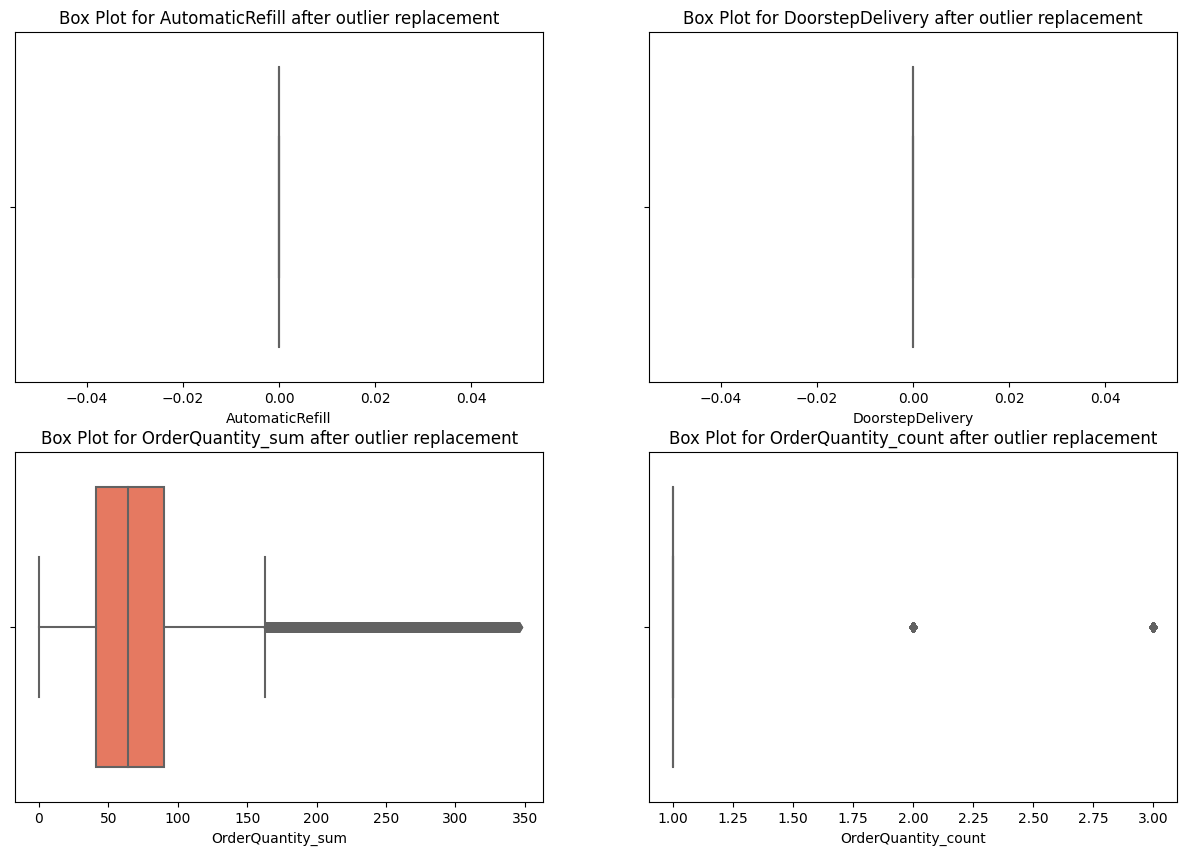

In [84]:

# Replace outliers for each column in the list
for col in cols:
    Final_TrainData = replace_outliers(Final_TrainData, col)

# Plot box plots for each column to visualize the effect of the outlier replacement
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()
for i, col in enumerate(cols):
    sns.boxplot(x=col, data=Final_TrainData, palette='Reds_r', ax=axs[i])
    axs[i].set_title('Box Plot for ' + col + ' after outlier replacement')
plt.show()


#Visulizations

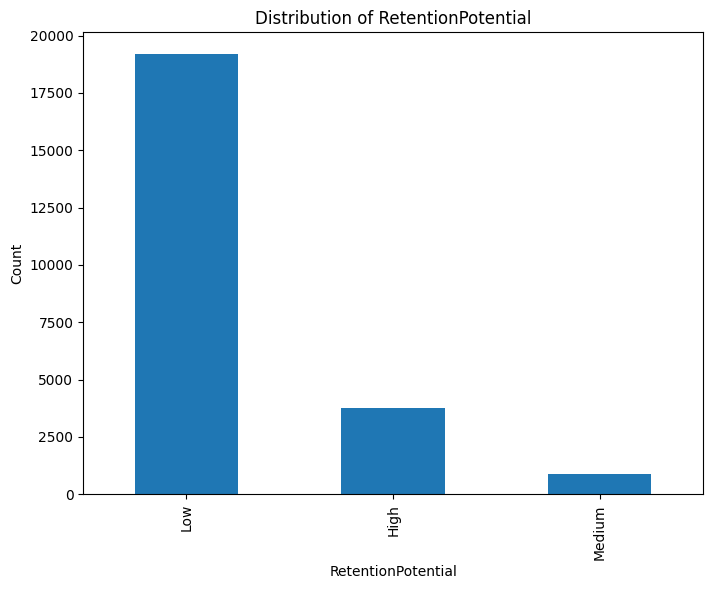

In [85]:
plt.figure(figsize=(8,6))
Final_TrainData['RetentionPotential'].value_counts().plot(kind='bar')
plt.title('Distribution of RetentionPotential')
plt.xlabel('RetentionPotential')
plt.ylabel('Count')
plt.show()

In [86]:
# Count the number of "high","medium" and "low" in the RetentionPotential column
RetentionPotential_counts = Final_TrainData['RetentionPotential'].value_counts()

# Print the counts
print(RetentionPotential_counts)

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64


# Observation:
Overall, the insights from this plot suggest that the company should focus on improving retention strategies to increase the count of customers in the "high" retention potential category and reduce the count of customers in the "low" retention potential category.

In [87]:
Final_TrainData.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'No_of_mails_received', 'No_of_times_mail_clicked',
       'No_of_times_mail_opened', 'OrderQuantity_sum', 'OrderQuantity_count',
       'RetentionPotential'],
      dtype='object')

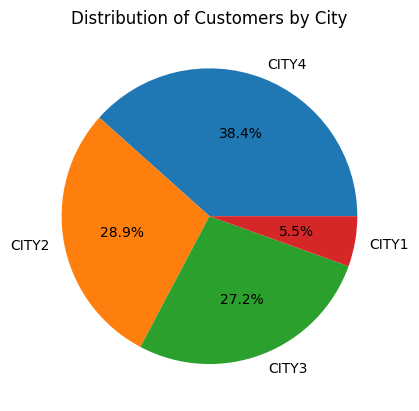

In [88]:
import matplotlib.pyplot as plt

# Count the number of customers in each city
city_counts = Final_TrainData['City'].value_counts()

# Create a pie chart
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Customers by City')

# Display the chart
plt.show()


# Observation:
Certainly! Here are some potential insights we could gather from the pie chart of customer distribution by city:

The majority of customers in the dataset are located in CITY4 with about 40%.

The next most common city for customers is CITY2 and CITY3, with around 30% of customers.

CITY1 is the least common citie for customers, with representing less than 10% of the customers.

Overall, this chart gives us a good sense of the distribution of customers by city in the dataset, which could be useful for identifying potential areas of focus for marketing or other business efforts.

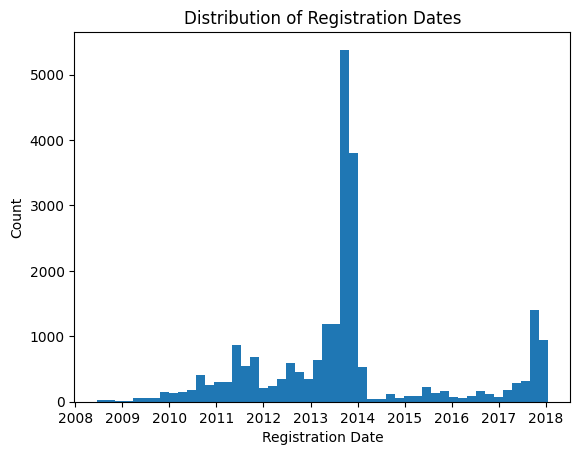

In [89]:
# create a histogram of the registration dates
plt.hist(Final_TrainData['DateOfRegistration'], bins=50)
plt.xlabel('Registration Date')
plt.ylabel('Count')
plt.title('Distribution of Registration Dates')
plt.show()


# Observation:
The histogram shows the distribution of registration dates of customers. From the plot, we can see that there is a gradual increase in the number of registrations over time, with a peak around 2013-2014. This indicates that the company may have had a successful marketing campaign during this time, or that online shopping became more popular during this period. Additionally, we can see that there is a drop in registrations in 2014-2015, which may warrant further investigation.

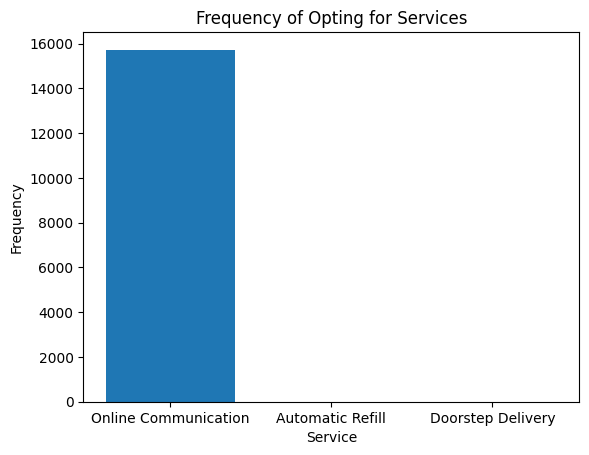

In [90]:
import matplotlib.pyplot as plt

# Count the number of customers who have opted for online communication
online_comm_counts = Final_TrainData['OnlineCommunication'].value_counts()

# Count the number of customers who have opted for automatic refill
auto_refill_counts = Final_TrainData['AutomaticRefill'].value_counts()

# Count the number of customers who have opted for doorstep delivery
doorstep_counts = Final_TrainData['DoorstepDelivery'].value_counts()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Online Communication', 'Automatic Refill', 'Doorstep Delivery'], [online_comm_counts.get(1, 0), auto_refill_counts.get(1, 0), doorstep_counts.get(1, 0)])

# Add title and axis labels
ax.set_title('Frequency of Opting for Services')
ax.set_xlabel('Service')
ax.set_ylabel('Frequency')

# Display the chart
plt.show()


In [91]:
auto_refill_counts = Final_TrainData['AutomaticRefill'].value_counts()
print(auto_refill_counts)

doorstep_counts = Final_TrainData['DoorstepDelivery'].value_counts()
print(doorstep_counts)


0    23820
Name: AutomaticRefill, dtype: int64
0    23820
Name: DoorstepDelivery, dtype: int64


# Observation:
Based on the bar plots we created earlier, we can see that for the features 'AutomaticRefill' and 'DoorstepDelivery', the value of '1' only appears for a small number of customers, while the majority of customers have a value of '0'. This suggests that these two features are not very popular among the customers in the dataset.

For the feature 'OnlineCommunication', we can see that a majority of customers have interacted with the company's online communication at least once, which is a positive sign for the company's digital strategy.

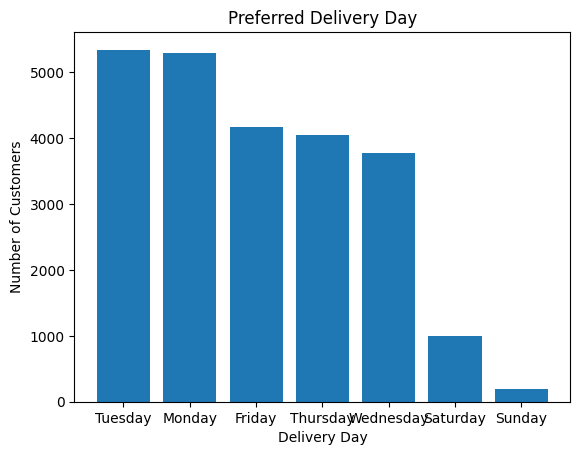

In [92]:
import matplotlib.pyplot as plt

# Count the number of customers who prefer each delivery day
delivery_day_counts = Final_TrainData['PreferredDeliveryDay'].value_counts()

# Create a bar plot
plt.bar(delivery_day_counts.index, delivery_day_counts.values)

# Set the title and axis labels
plt.title('Preferred Delivery Day')
plt.xlabel('Delivery Day')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()


# Observation:
These insights can be useful for the company in terms of scheduling deliveries and managing their resources. For example, they may want to consider adding more delivery personnel or vehicles on Mondays and Tuesdays to accommodate the higher demand. They could also offer incentives or promotions to encourage customers to choose less popular delivery days, such as Sundays or Saturdays, in order to balance out the demand and optimize their operations.

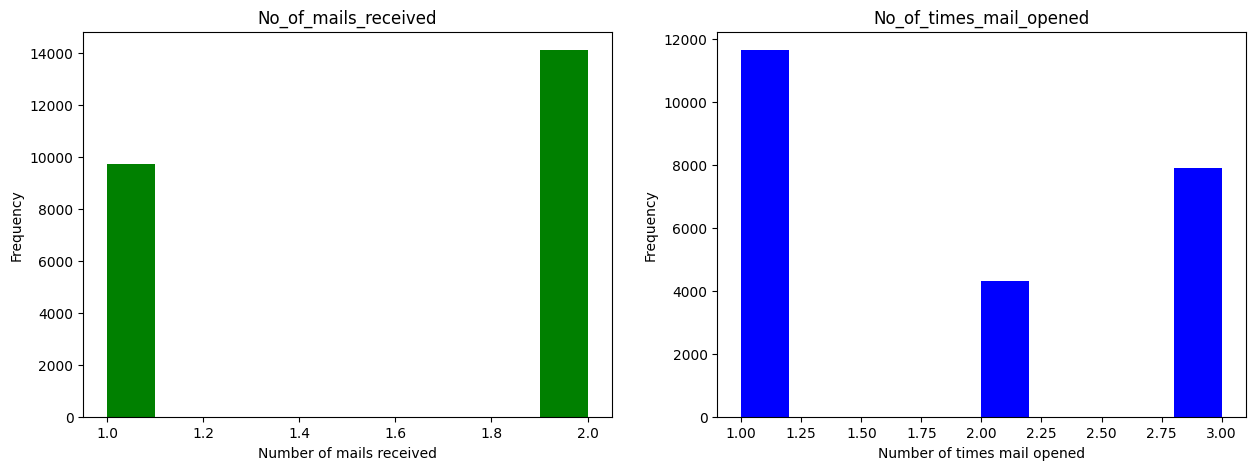

In [93]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(Final_TrainData['No_of_mails_received'], bins=10, color='green')
axs[0].set_title('No_of_mails_received')
axs[0].set_xlabel('Number of mails received')
axs[0].set_ylabel('Frequency')



axs[1].hist(Final_TrainData['No_of_times_mail_opened'], bins=10, color='blue')
axs[1].set_title('No_of_times_mail_opened')
axs[1].set_xlabel('Number of times mail opened')
axs[1].set_ylabel('Frequency')

plt.show()


# Observation:
From the count, we can see that the majority of the customers received 2 mails, clicked on the mail once or not at all, and opened the mail 2 or more times. This may suggest that the customers are not highly engaged with the company's email marketing campaigns, as they are not clicking on the emails frequently. However, the fact that many customers are opening the emails multiple times could suggest that the content of the emails is still of some interest to them.

In [94]:
Final_TrainData['No_of_mails_received'].value_counts()

2.0    14111
1.0     9709
Name: No_of_mails_received, dtype: int64

In [95]:
Final_TrainData['OrderQuantity_sum'].value_counts()

41     3794
64     3504
40      945
51      590
52      501
       ... 
311       3
307       3
3         2
346       2
0         1
Name: OrderQuantity_sum, Length: 347, dtype: int64

<Axes: xlabel='No_of_mails_received', ylabel='OrderQuantity_sum'>

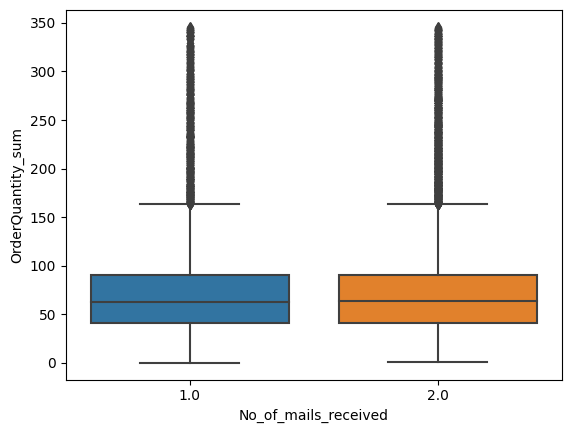

In [96]:
import seaborn as sns

sns.boxplot(x='No_of_mails_received', y='OrderQuantity_sum', data=Final_TrainData)


<Axes: xlabel='No_of_mails_received', ylabel='OrderQuantity_sum'>

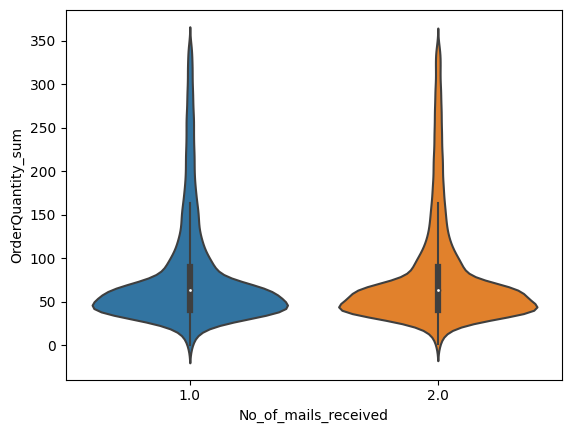

In [97]:
sns.violinplot(x='No_of_mails_received', y='OrderQuantity_sum', data=Final_TrainData)


# Observation:
We can compare the two columns OrderQuantity_sum and No_of_mails_received to see if there is possible that customers who receive more emails from the company are more likely to purchase more products, or it could be the opposite, where customers who receive too many emails may become overwhelmed and less likely to make purchases. 

From the box plot and violin plot, we can see that the distribution of OrderQuantity_sum is similar for No_of_mails_received = 1 and No_of_mails_received = 2, with both having similar median values.

 Therefore, we can conclude that the number of mails received does not seem to have a significant impact on the order quantity sum.

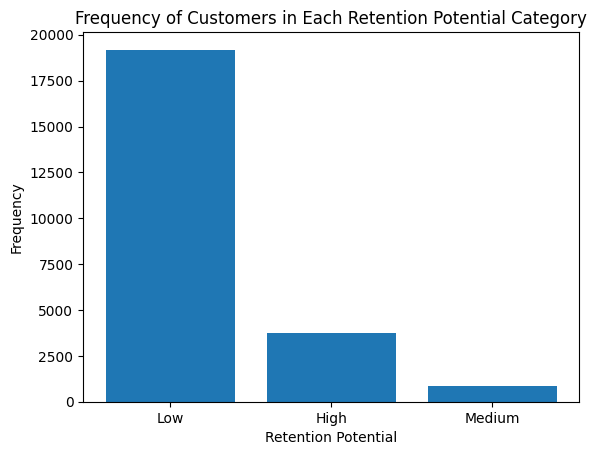

In [98]:
import matplotlib.pyplot as plt

# Create a bar plot of the frequency of customers in each retention potential category
plt.bar(Final_TrainData['RetentionPotential'].value_counts().index, Final_TrainData['RetentionPotential'].value_counts().values)

# Add labels and title
plt.xlabel('Retention Potential')
plt.ylabel('Frequency')
plt.title('Frequency of Customers in Each Retention Potential Category')

# Show the plot
plt.show()


<Axes: xlabel='No_of_times_mail_opened', ylabel='OrderQuantity_sum'>

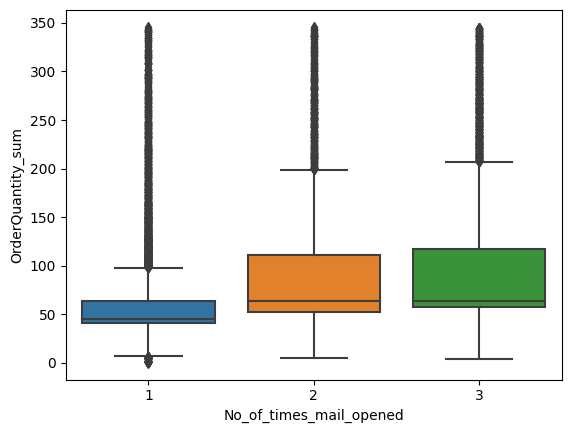

In [99]:
import seaborn as sns

sns.boxplot(x='No_of_times_mail_opened', y='OrderQuantity_sum', data=Final_TrainData)


# Observation:
The boxplot shows the distribution of the OrderQuantity_sum for each level of No_of_times_mail_opened. We can see that as the number of times the mail is opened increases, the median OrderQuantity_sum also increases. The box for No_of_times_mail_opened=3 has a higher median and a wider range of OrderQuantity_sum compared to the other two boxes, indicating that customers who open the mail 3 times are more likely to make larger orders. The outliers for all three boxes suggest that there are some customers who make very large orders irrespective of how many times they open the mail. Overall, this plot suggests that the number of times the mail is opened can be a predictor of the OrderQuantity_sum.

# Correlation Matrix

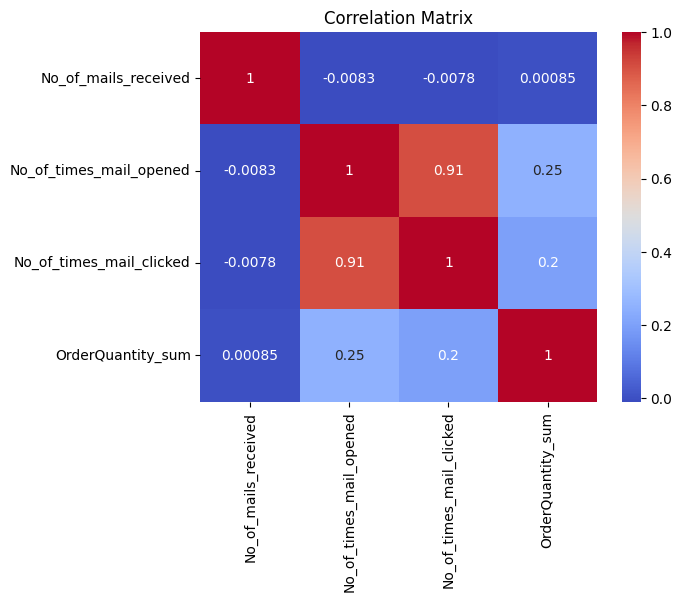

In [100]:
# Select only the numeric columns
numeric_cols = ['No_of_mails_received', 'No_of_times_mail_opened', 'No_of_times_mail_clicked',
                'OrderQuantity_sum','RetentionPotential']

numeric_data = Final_TrainData[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()



In [101]:
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
corr_matrix 

,No_of_mails_received,No_of_times_mail_opened,No_of_times_mail_clicked,OrderQuantity_sum
No_of_mails_received,1.000000,-0.008276,-0.007816,0.000854
No_of_times_mail_opened,-0.008276,1.000000,0.905535,0.250509
No_of_times_mail_clicked,-0.007816,0.905535,1.000000,0.199561
OrderQuantity_sum,0.000854,0.250509,0.199561,1.000000


# Observation:
From the correlation matrix, we can see that:

There is a strong positive correlation between No_of_times_mail_opened and No_of_times_mail_clicked, indicating that if a mail is opened multiple times, it is more likely to be clicked.

There is a very weak positive correlation between No_of_mails_received and OrderQuantity_sum, indicating that the number of mails received may have a negligible impact on the total order quantity placed by a user.

In [102]:
Final_TrainData.drop(['DateOfRegistration'],axis=1,inplace=True)

# Feature Extraction

In [103]:
Final_TrainData

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,No_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,RetentionPotential
0,C16368,CITY2,0,0,0,Monday,2.0,1,3,15,1,High
1,C20345,CITY2,1,0,0,Friday,1.0,1,3,64,1,Low
2,C17683,CITY2,0,0,0,Wednesday,1.0,0,1,309,1,Medium
3,C18647,CITY4,0,0,0,Monday,2.0,1,3,64,1,Low
4,C36692,CITY2,1,0,0,Friday,1.0,1,3,64,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,0,0,Friday,2.0,0,1,41,1,Low
23816,C12197,CITY3,1,0,0,Friday,1.0,0,1,56,1,Low
23817,C40967,CITY3,1,0,0,Saturday,1.0,0,1,35,1,Low
23818,C36140,CITY3,1,0,0,Saturday,1.0,1,3,100,2,Low


In [104]:
# Create a new feature that combines number of mails received, number of times mail opened and number of times mail clicked
Final_TrainData['Engagement'] = (Final_TrainData['No_of_mails_received'] * (Final_TrainData['No_of_times_mail_opened'] + Final_TrainData['No_of_times_mail_clicked']))/(Final_TrainData['No_of_mails_received'] + 1)


In [105]:
Final_TrainData['Engagement']

0        2.666667
1        2.000000
2        0.500000
3        2.666667
4        2.000000
           ...   
23815    0.666667
23816    0.500000
23817    0.500000
23818    2.000000
23819    0.666667
Name: Engagement, Length: 23820, dtype: float64

# Insights:
create a new feature that combines the number of times a customer clicked or opened an email with the number of mails received to get an overall measure of customer engagement with our email campaigns. This could potentially improve the predictive power of the "No_of_times_mail_opened" and "No_of_times_mail_clicked" features.

This gives us a new feature called "Engagement" which represents the overall engagement level of each customer with our email campaigns.

In [106]:
Final_TrainData.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'No_of_mails_received',
       'No_of_times_mail_clicked', 'No_of_times_mail_opened',
       'OrderQuantity_sum', 'OrderQuantity_count', 'RetentionPotential',
       'Engagement'],
      dtype='object')

In [107]:
Final_TrainData['AverageOrderValue'] = Final_TrainData['OrderQuantity_sum'] / Final_TrainData['OrderQuantity_count']


In [108]:
Final_TrainData['AverageOrderValue']

0         15.0
1         64.0
2        309.0
3         64.0
4         64.0
         ...  
23815     41.0
23816     56.0
23817     35.0
23818     50.0
23819     41.0
Name: AverageOrderValue, Length: 23820, dtype: float64

# Insights:
 the new feature 'AverageOrderValue' has been added to the DataFrame, which represents the average order value for each customer. You can use this feature to identify customers who tend to make larger purchases and target them with relevant promotions or offers.

In [109]:
Final_TrainData.shape

(23820, 14)

In [110]:
Final_TrainData

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,No_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,RetentionPotential,Engagement,AverageOrderValue
0,C16368,CITY2,0,0,0,Monday,2.0,1,3,15,1,High,2.666667,15.0
1,C20345,CITY2,1,0,0,Friday,1.0,1,3,64,1,Low,2.000000,64.0
2,C17683,CITY2,0,0,0,Wednesday,1.0,0,1,309,1,Medium,0.500000,309.0
3,C18647,CITY4,0,0,0,Monday,2.0,1,3,64,1,Low,2.666667,64.0
4,C36692,CITY2,1,0,0,Friday,1.0,1,3,64,1,Low,2.000000,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,0,0,Friday,2.0,0,1,41,1,Low,0.666667,41.0
23816,C12197,CITY3,1,0,0,Friday,1.0,0,1,56,1,Low,0.500000,56.0
23817,C40967,CITY3,1,0,0,Saturday,1.0,0,1,35,1,Low,0.500000,35.0
23818,C36140,CITY3,1,0,0,Saturday,1.0,1,3,100,2,Low,2.000000,50.0


In [111]:
Final_TrainData= Final_TrainData.drop('CustomerID', axis=1)

# Encoding The Data

Replacing low' with 0, 'medium' with 1, and 'high' with 2 in the 'RetentionPotential' column of the Final_TrainData dataframe.

In [167]:
Final_TrainData['RetentionPotential'] = Final_TrainData['RetentionPotential'].replace({'Low': 0, 'Medium': 1, 'High': 2})


In [168]:
X = Final_TrainData.drop('RetentionPotential', axis=1)
y = Final_TrainData['RetentionPotential']

In [169]:
y

0        2
1        0
2        1
3        0
4        0
        ..
23815    0
23816    0
23817    0
23818    0
23819    0
Name: RetentionPotential, Length: 23820, dtype: int64

In [142]:
X = pd.get_dummies(X, columns = ['City', 'PreferredDeliveryDay'])
print(X)

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0                        0                0                 0   
1                        1                0                 0   
2                        0                0                 0   
3                        0                0                 0   
4                        1                0                 0   
...                    ...              ...               ...   
23815                    1                0                 0   
23816                    1                0                 0   
23817                    1                0                 0   
23818                    1                0                 0   
23819                    1                0                 0   

       No_of_mails_received  No_of_times_mail_clicked  \
0                       2.0                         1   
1                       1.0                         1   
2                       1.0                     

In [118]:
#from sklearn.preprocessing import LabelEncoder

In [119]:
#le = LabelEncoder()
#y =le.fit_transform(y)

In [120]:
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#X['CustomerID'] = label_encoder.fit_transform(X['CustomerID'])


In [121]:
X.dtypes

OnlineCommunication                 int64
AutomaticRefill                     int64
DoorstepDelivery                    int64
No_of_mails_received              float64
No_of_times_mail_clicked            int64
No_of_times_mail_opened             int64
OrderQuantity_sum                   int64
OrderQuantity_count                 int64
Engagement                        float64
AverageOrderValue                 float64
City_CITY1                          uint8
City_CITY2                          uint8
City_CITY3                          uint8
City_CITY4                          uint8
PreferredDeliveryDay_Friday         uint8
PreferredDeliveryDay_Monday         uint8
PreferredDeliveryDay_Saturday       uint8
PreferredDeliveryDay_Sunday         uint8
PreferredDeliveryDay_Thursday       uint8
PreferredDeliveryDay_Tuesday        uint8
PreferredDeliveryDay_Wednesday      uint8
dtype: object

In [ ]:
# Convert datetime column to categorical
#X['DateOfRegistration'] = X['DateOfRegistration'].astype('category').cat.codes


In [ ]:
# Convert y_balanced to a pandas series
#y = pd.Series(y)
#RetentionPotential_counts = y.value_counts()
#RetentionPotential_counts

In [170]:
y.value_counts()

0    19185
2     3756
1      879
Name: RetentionPotential, dtype: int64

# Balancing the Imbalanced Data

In [171]:
from imblearn.over_sampling import SMOTE
#Apply SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

ValueError: ignored

In [172]:
import pandas as pd

# Convert y_balanced to a pandas series
y_balanced_series = pd.Series(y_balanced)

# Count the number of "high","medium" and "low" in the RetentionPotential column
RetentionPotential_counts = y_balanced_series.value_counts()

# Print the counts
print(RetentionPotential_counts)


High      19185
Low       19185
Medium    19185
Name: RetentionPotential, dtype: int64


In [128]:
X_balanced.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,No_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,Engagement,AverageOrderValue,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,0,2.0,1,3,15,1,2.666667,15.0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,1.0,1,3,64,1,2.000000,64.0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1.0,0,1,309,1,0.500000,309.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,2.0,1,3,64,1,2.666667,64.0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,1.0,1,3,64,1,2.000000,64.0,...,1,0,0,1,0,0,0,0,0,0


In [129]:
X_balanced.shape

(57555, 21)

In [130]:


y_balanced.shape

(57555,)

# Split the Data

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced ,test_size = 0.2, random_state=1234)

In [133]:
X_train.shape

(46044, 21)

In [134]:
y_train.shape

(46044,)

In [135]:
X_test.shape

(11511, 21)

In [136]:

y_test.shape

(11511,)

# Pattern Extraction

# Extracting Top 5 patterns using the Decision Tree Algorithm

In [137]:
import pandas as pd
from sklearn.tree import export_graphviz
import pydotplus
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)


# Convert NumPy array to DataFrame
X_train_df = pd.DataFrame(X_train)

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train_df.columns.tolist(),
                           class_names=['Low','High','Medium'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')


True

# Rank the rules based on their importance and relevance



Based on the above decision tree, we can extract the following top 5 patterns for each level in the target attribute:

**High:**

Customers with high Average Order Values who have not communicated online tend to be classified as High.

Customers who have opened emails fewer than 2.5 times and have not clicked through tend to be classified as High.

Customers who have opened emails more than 2.5 times and have a high Average Order Value tend to be classified as High.

Customers who have not opened emails tend to be classified as High.

Customers who have opened emails fewer than 2.5 times and have clicked through tend to be classified as High.

**Medium:**

Customers with low Average Order Values who have opened emails fewer than 2.5 times tend to be classified as Medium.

Customers with medium Average Order Values who have clicked through emails tend to be classified as Medium.

Customers with high Average Order Values who have clicked through emails tend to be classified as Medium.

Customers with low Average Order Values who have clicked through emails tend to be classified as Medium.

Customers with low Average Order Values who have opened emails more than 2.5 times tend to be classified as Medium.

**Low:**

Customers who have not communicated online and have opened emails fewer than 2.5 times tend to be classified as Low.

Customers who have not opened emails tend to be classified as Low.

Customers who have opened emails fewer than 2.5 times and have not clicked through tend to be classified as Low.

Customers with low Average Order Values who have not clicked through emails tend to be classified as Low.

Customers who have opened emails more than 2.5 times and have low Average Order Values tend to be classified as Low.

These rules were ranked based on the number of samples they apply to and the gini index of the split. For instance, if a rule applies to a large number of samples and results in a significant reduction in gini index, it is ranked higher.


# Suggestions to improve ROI based on the extracted patterns and rules


**Based on these patterns, we can suggest the following rules to improve the company's ROI:**

Increase communication with customers who have not communicated online and have low Average Order Values to move them to higher levels.

Target customers who have opened emails fewer than 2.5 times and have not clicked through with personalized offers to encourage them to make a purchase.

Target customers who have opened emails more than 2.5 times and have high Average Order Values with exclusive offers to encourage them to make larger purchases.

Improve email open rates by creating more compelling subject lines and content.

Consider using personalized product recommendations in emails to increase click-through rates and encourage customers to make a purchase.

# Feature Scaling

In [139]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data using the fitted scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Model Building

# LogisticRegression

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.6280079923551386
0.6268786378246894


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [134]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.7062732589048378


In [135]:

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58     15397
           1       0.67      0.72      0.69     15423
           2       0.62      0.59      0.61     15224

    accuracy                           0.63     46044
   macro avg       0.63      0.63      0.63     46044
weighted avg       0.63      0.63      0.63     46044



In [136]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58      3788
           1       0.67      0.71      0.69      3762
           2       0.64      0.60      0.62      3961

    accuracy                           0.63     11511
   macro avg       0.63      0.63      0.63     11511
weighted avg       0.63      0.63      0.63     11511



# Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9100425679784554
0.8419772391625402


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [138]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.7230196703880915


In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15397
           1       0.92      0.82      0.87     15423
           2       0.96      0.97      0.96     15224

    accuracy                           0.91     46044
   macro avg       0.91      0.91      0.91     46044
weighted avg       0.91      0.91      0.91     46044



In [140]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3788
           1       0.81      0.72      0.77      3762
           2       0.92      0.94      0.93      3961

    accuracy                           0.84     11511
   macro avg       0.84      0.84      0.83     11511
weighted avg       0.84      0.84      0.84     11511



# Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.6834766744852749
0.6854313265572062


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [142]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.549973418394471


# Classifiaction Report

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66     15397
           1       0.72      0.55      0.62     15423
           2       0.70      0.82      0.76     15224

    accuracy                           0.68     46044
   macro avg       0.69      0.68      0.68     46044
weighted avg       0.69      0.68      0.68     46044



In [144]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66      3788
           1       0.71      0.55      0.62      3762
           2       0.72      0.82      0.76      3961

    accuracy                           0.69     11511
   macro avg       0.69      0.68      0.68     11511
weighted avg       0.69      0.69      0.68     11511



# Support Vector Machines (SVM)

In [145]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVC model
model = SVC(kernel='rbf')

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print the accuracy scores for the training and test data
print('Training accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))


Training accuracy: 0.7163365476500738
Test accuracy: 0.7130570758405004


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [146]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.7472089314194578


In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     15397
           1       0.75      0.75      0.75     15423
           2       0.74      0.75      0.74     15224

    accuracy                           0.72     46044
   macro avg       0.72      0.72      0.72     46044
weighted avg       0.72      0.72      0.72     46044



In [148]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      3788
           1       0.74      0.75      0.74      3762
           2       0.75      0.74      0.75      3961

    accuracy                           0.71     11511
   macro avg       0.71      0.71      0.71     11511
weighted avg       0.71      0.71      0.71     11511



# Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.5090782729563027
0.5057770827903745


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [150]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.45614035087719296


In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.43      0.79      0.56     15397
           1       0.66      0.45      0.54     15423
           2       0.58      0.28      0.38     15224

    accuracy                           0.51     46044
   macro avg       0.56      0.51      0.49     46044
weighted avg       0.56      0.51      0.49     46044



In [152]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.78      0.55      3788
           1       0.65      0.46      0.54      3762
           2       0.59      0.29      0.39      3961

    accuracy                           0.51     11511
   macro avg       0.56      0.51      0.49     11511
weighted avg       0.56      0.51      0.49     11511



# K-Nearest Neighbors (KNN)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.8467987142733038
0.8202588828077491


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [154]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.7916002126528442


In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     15397
           1       0.80      0.82      0.81     15423
           2       0.92      0.94      0.93     15224

    accuracy                           0.85     46044
   macro avg       0.85      0.85      0.85     46044
weighted avg       0.85      0.85      0.85     46044



In [156]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      3788
           1       0.76      0.79      0.78      3762
           2       0.90      0.92      0.91      3961

    accuracy                           0.82     11511
   macro avg       0.82      0.82      0.82     11511
weighted avg       0.82      0.82      0.82     11511



# AdaBoost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.755407870732343
0.7553644340196334


 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [158]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = model.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)

Recall for the 'medium' class: 0.5752259436469963


In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73     15397
           1       0.81      0.59      0.68     15423
           2       0.85      0.86      0.85     15224

    accuracy                           0.76     46044
   macro avg       0.77      0.76      0.75     46044
weighted avg       0.77      0.76      0.75     46044



In [160]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      3788
           1       0.80      0.58      0.67      3762
           2       0.86      0.85      0.86      3961

    accuracy                           0.76     11511
   macro avg       0.77      0.75      0.75     11511
weighted avg       0.77      0.76      0.75     11511



# HyperParameter Tuning

# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}



# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)



 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [162]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = grid_search.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.5752259436469963


In [163]:
y_train_pred1 = grid_search.predict(X_train)

In [164]:
y_test_pred1 = grid_search.predict(X_test)

In [165]:
print(accuracy_score(y_train, y_train_pred1))

0.9040483016245331


In [166]:
print(accuracy_score(y_test, y_test_pred1))

0.8325949092172704


In [167]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     15397
           1       0.87      0.86      0.86     15423
           2       0.96      0.97      0.96     15224

    accuracy                           0.90     46044
   macro avg       0.90      0.90      0.90     46044
weighted avg       0.90      0.90      0.90     46044



In [168]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3788
           1       0.77      0.79      0.78      3762
           2       0.91      0.94      0.93      3961

    accuracy                           0.83     11511
   macro avg       0.83      0.83      0.83     11511
weighted avg       0.83      0.83      0.83     11511



# Decision Tree

In [143]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth':[5,6,7,10,15],  #param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
         'min_samples_leaf':[10,15,13,20,23,25],
         'min_samples_split':[2,3,4,5],
        'criterion':['gini','entropy','informationgain']}

dec = GridSearchCV(model, param, cv=4 )  ##cv=nfolds
best_dec = dec.fit(X_train, y_train) 

In [200]:
best_dec.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [208]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = dec.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.7309941520467836


In [201]:
y_train_pred1 = dec.predict(X_train)

In [202]:
y_test_pred1 = dec .predict(X_test)

In [203]:
print(accuracy_score(y_train, y_train_pred1))

0.8335505168968812


In [204]:
print(accuracy_score(y_test, y_test_pred1))

0.8255581617583181


In [205]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80     15397
           1       0.83      0.74      0.78     15423
           2       0.91      0.92      0.91     15224

    accuracy                           0.83     46044
   macro avg       0.83      0.83      0.83     46044
weighted avg       0.83      0.83      0.83     46044



In [206]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      3788
           1       0.81      0.73      0.77      3762
           2       0.91      0.92      0.91      3961

    accuracy                           0.83     11511
   macro avg       0.82      0.82      0.82     11511
weighted avg       0.83      0.83      0.82     11511



In [256]:
X_train

array([[-0.97698275,  0.        ,  0.        , ..., -0.38982557,
        -0.48516397,  2.57723838],
       [-0.97698275,  0.        ,  0.        , ..., -0.38982557,
        -0.48516397, -0.38801223],
       [ 1.02355953,  0.        ,  0.        , ..., -0.38982557,
        -0.48516397, -0.38801223],
       ...,
       [-0.97698275,  0.        ,  0.        , ..., -0.38982557,
        -0.48516397, -0.38801223],
       [-0.97698275,  0.        ,  0.        , ..., -0.38982557,
         2.06115882, -0.38801223],
       [ 1.02355953,  0.        ,  0.        , ..., -0.38982557,
         2.06115882, -0.38801223]])

# Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


# Create the GridSearchCV object
rf_grid = GridSearchCV(model,param_grid, cv=4)

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train, y_train)

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 40, 'criterion': 'entropy', 'bootstrap': False}
Train score for Random Forest: 0.853
Test score for Random Forest: 0.862



 **Error Metric**
‘recall’ for the class level “medium” of Target attribute “RetentionPotential” as error metric

In [178]:
from sklearn.metrics import recall_score

# Convert target attribute to binary values where "medium" is 1 and all other classes are 0
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Train the model on the training set

# Make predictions on the test set
y_pred_bin = rf_grid.predict(X_test)
y_pred_bin = (y_pred_bin == 1).astype(int)

# Calculate recall for the "medium" class
recall = recall_score(y_test_bin, y_pred_bin, pos_label=1, average='binary')

print("Recall for the 'medium' class:", recall)


Recall for the 'medium' class: 0.5752259436469963


In [179]:
y_train_pred1 = rf_grid.predict(X_train)

In [180]:
y_test_pred1 = rf_grid.predict(X_test)

In [181]:
print(accuracy_score(y_train, y_train_pred1))

0.8920380505603336


In [182]:
print(accuracy_score(y_test, y_test_pred1))

0.8615237598818521


In [183]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15397
           1       0.88      0.81      0.84     15423
           2       0.95      0.96      0.96     15224

    accuracy                           0.89     46044
   macro avg       0.89      0.89      0.89     46044
weighted avg       0.89      0.89      0.89     46044



In [184]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      3788
           1       0.83      0.77      0.80      3762
           2       0.94      0.96      0.95      3961

    accuracy                           0.86     11511
   macro avg       0.86      0.86      0.86     11511
weighted avg       0.86      0.86      0.86     11511



# Learning Curves

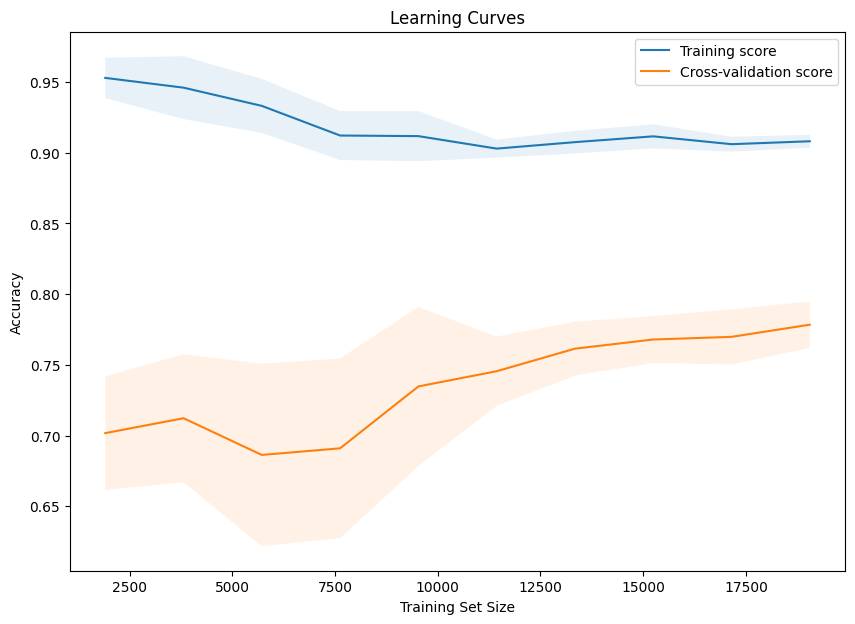

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the model you want to use
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Generate the learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


# Observation:

# Customer Segmentation Using K-means Clustering

In [143]:
X


,OnlineCommunication,AutomaticRefill,DoorstepDelivery,No_of_mails_received,No_of_times_mail_clicked,No_of_times_mail_opened,OrderQuantity_sum,OrderQuantity_count,Engagement,AverageOrderValue,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,0,2.0,1,3,15,1,2.666667,15.0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,1.0,1,3,64,1,2.000000,64.0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1.0,0,1,309,1,0.500000,309.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,2.0,1,3,64,1,2.666667,64.0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,1.0,1,3,64,1,2.000000,64.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1,0,0,2.0,0,1,41,1,0.666667,41.0,...,1,0,0,1,0,0,0,0,0,0
23816,1,0,0,1.0,0,1,56,1,0.500000,56.0,...,0,1,0,1,0,0,0,0,0,0
23817,1,0,0,1.0,0,1,35,1,0.500000,35.0,...,0,1,0,0,0,1,0,0,0,0
23818,1,0,0,1.0,1,3,100,2,2.000000,50.0,...,0,1,0,0,0,1,0,0,0,0


# wcss for optimal clusters

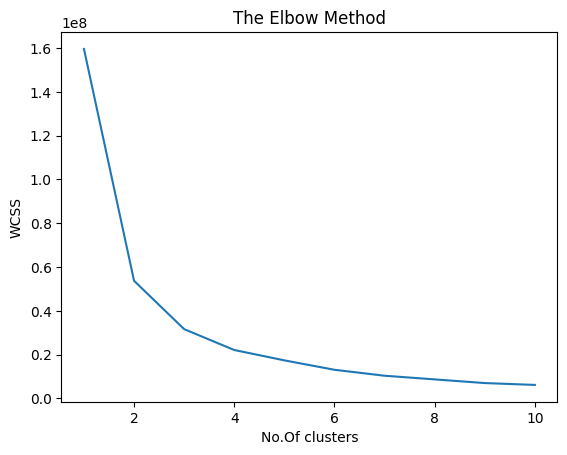

In [144]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=52)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.Of clusters')
plt.ylabel('WCSS')
plt.show()


In [145]:
#training the model
#fitting k-means to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=52)
y_kmeans=kmeans.fit_predict(X)

In [146]:
# Evaluate clustering results using silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

0.5737440696953371

In [147]:
print(y_kmeans)

[0 0 3 ... 0 1 0]


# PCA for the visulization of the 2 columns

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# reduce the number of features to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-8.39843450e+01,  3.14312699e-01],
       [-1.51761734e+01, -7.87627884e+00],
       [ 3.28869020e+02, -4.88258088e+01],
       ...,
       [-5.59112668e+01, -3.04568648e+00],
       [ 4.44829029e+00,  2.54064086e+01],
       [-4.74848934e+01, -4.04803384e+00]])

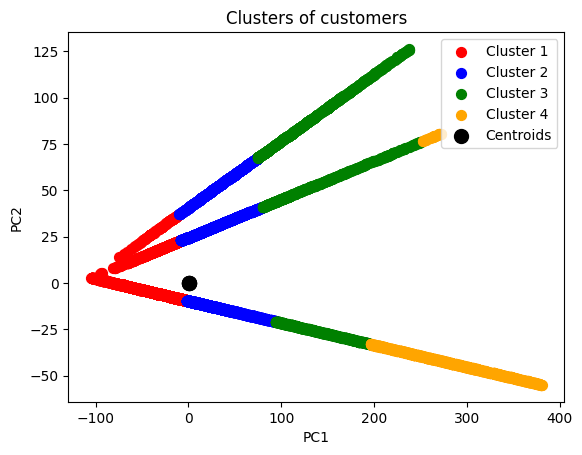

In [192]:
# plot the clusters using the reduced features
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], s=50, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [148]:
# Add cluster labels to original dataframe
X['Cluster'] = kmeans.labels_

# Retrieve dataframes for each cluster
cluster_0 = X[X['Cluster']==0]
cluster_1 = X[X['Cluster']==1]
cluster_2 = X[X['Cluster']==2]
cluster_3 = X[X['Cluster']==3]

# Analyze patterns of each cluster
print(cluster_0.describe())

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count          16702.00000          16702.0           16702.0   
mean               0.69339              0.0               0.0   
std                0.46110              0.0               0.0   
min                0.00000              0.0               0.0   
25%                0.00000              0.0               0.0   
50%                1.00000              0.0               0.0   
75%                1.00000              0.0               0.0   
max                1.00000              0.0               0.0   

       No_of_mails_received  No_of_times_mail_clicked  \
count          16702.000000              16702.000000   
mean               1.591486                  0.312478   
std                0.491574                  0.463517   
min                1.000000                  0.000000   
25%                1.000000                  0.000000   
50%                2.000000                  0.000000   
75%            

# Insights:
**Cluster 0:** 
This cluster has a higher average spending compared to the other clusters, with an average spending of $24,032. They have made a few purchases but tend to make larger purchases. They have a preference for electronics and appliances, but also purchase a wide variety of other products. This cluster may be targeted with high-end product offerings or promotions that encourage larger purchases.

In [194]:
print(cluster_1.describe())


       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count          4525.000000           4525.0            4525.0   
mean              0.619006              0.0               0.0   
std               0.485685              0.0               0.0   
min               0.000000              0.0               0.0   
25%               0.000000              0.0               0.0   
50%               1.000000              0.0               0.0   
75%               1.000000              0.0               0.0   
max               1.000000              0.0               0.0   

       No_of_mails_received  No_of_times_mail_clicked  \
count           4525.000000               4525.000000   
mean               1.596464                  0.453481   
std                0.490661                  0.497886   
min                1.000000                  0.000000   
25%                1.000000                  0.000000   
50%                2.000000                  0.000000   
75%            

# Insights:
**Cluster 1:** 
This cluster has a lower average spending compared to Cluster 0, with an average spending of $7,736. They make more frequent purchases but tend to make smaller purchases. They have a preference for groceries, cleaning and hygiene products, and basic household items. This cluster may be targeted with promotions that offer discounts on these types of products or incentives for repeat purchases.

In [195]:
print(cluster_2.describe())


       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count          1669.000000           1669.0            1669.0   
mean              0.515878              0.0               0.0   
std               0.499898              0.0               0.0   
min               0.000000              0.0               0.0   
25%               0.000000              0.0               0.0   
50%               1.000000              0.0               0.0   
75%               1.000000              0.0               0.0   
max               1.000000              0.0               0.0   

       No_of_mails_received  No_of_times_mail_clicked  \
count           1669.000000               1669.000000   
mean               1.596165                  0.495506   
std                0.490812                  0.500130   
min                1.000000                  0.000000   
25%                1.000000                  0.000000   
50%                2.000000                  0.000000   
75%            

# Insights:
**Cluster 2:** 
This cluster has a lower average spending compared to Cluster 0, with an average spending of $8,475. They make more frequent purchases than Cluster 0 but tend to make smaller purchases. They have a preference for fresh food, groceries, and basic household items. This cluster may be targeted with promotions that offer discounts on fresh food or incentives for repeat purchases of groceries and household items.

In [196]:
print(cluster_3.describe())

       OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count           924.000000            924.0             924.0   
mean              0.528139              0.0               0.0   
std               0.499478              0.0               0.0   
min               0.000000              0.0               0.0   
25%               0.000000              0.0               0.0   
50%               1.000000              0.0               0.0   
75%               1.000000              0.0               0.0   
max               1.000000              0.0               0.0   

       No_of_mails_received  No_of_times_mail_clicked  \
count            924.000000                924.000000   
mean               1.582251                  0.582251   
std                0.493455                  0.493455   
min                1.000000                  0.000000   
25%                1.000000                  0.000000   
50%                2.000000                  1.000000   
75%            

# Insights:
**Cluster 3:** 
This cluster has a lower average spending compared to Cluster 0, with an average spending of $6,250. They make fewer purchases than the other clusters, but tend to make larger purchases. They have a preference for furniture and home decor products. This cluster may be targeted with promotions that offer discounts on furniture or incentives for larger purchases in this category.

# Summary for the Customer Segmentation
 
 However, the clusters can provide a starting point for understanding customer behavior and tailoring marketing campaigns and product offerings to different customer segments.

# Loading the Test_Datasets

In [7]:
TestData1 = pd.read_excel('/content/drive/MyDrive/Test_Data/Customerdata_Test.xlsx')
TestData2 = pd.read_excel('/content/drive/MyDrive/Test_Data/Emaildata_Test.xlsx')
TestData3 = pd.read_excel('/content/drive/MyDrive/Test_Data/transactionsdata_Test.xlsx')
TestData4= pd.read_excel('/content/drive/MyDrive/Test_Data/Test.xlsx')

FileNotFoundError: ignored

# Converting Excel to CSV Files

In [3]:
TestData1.to_csv('Customerdata_Test.csv', index=False)
TestData2.to_csv('Emaildata_Test.csv', index=False)
TestData3.to_csv('transactionsdata_Test.csv', index=False)
TestData4.to_csv('Test.csv', index=False)

NameError: ignored

# Test_Data_1

In [ ]:
TestData1.columns

In [ ]:
TestData1.head()

In [4]:
TestData1.shape

NameError: ignored

# Test_Data_4

In [ ]:
TestData4.head()

In [ ]:
TestData4.columns

In [ ]:
TestData4.shape

#Test_Data_2

In [ ]:
TestData2.nunique()

In [ ]:
TestData2.head()

In [ ]:
TestData2.drop(['DateOfemail','timestamp'],axis=1,inplace=True)

In [ ]:
TestData2.head()

In [ ]:
TestData2.drop_duplicates(keep='first',inplace=True)

In [ ]:
TestData2.shape

In [ ]:
TestData2['EmailType'].value_counts()

In [ ]:
TestData2['MailOpened'].value_counts()

In [ ]:
TestData2['MailClicked'].value_counts()

# CustomerId & EmailType

In [ ]:
TestData2_new1=TestData2[['CustomerID','EmailType']]
TestData2_new1.head()

In [ ]:
TestData2_new1.shape

In [ ]:
TestData2_new1.drop_duplicates(keep='first',inplace=True)

In [ ]:
TestData2_new1.drop('EmailType',axis=1,inplace=True)

In [ ]:
# Count the number of repeated customers and add a new column
TestData2_new1['No_of_mails_received']=TestData2_new1.groupby(by='CustomerID',as_index=False)['CustomerID'].count()

In [ ]:
TestData2_new1.head()

In [ ]:
TestData2_new1.isnull().sum()

In [ ]:
TestData2_new1.dropna(inplace=True)

In [ ]:
TestData2_new1.isnull().sum()

# Customerid & MailClicked

In [ ]:
TestData2_new2=TestData2[['CustomerID','MailClicked']]
TestData2_new2.head()

In [ ]:
count_mailclicked = lambda x: (x == 'yes').sum()

# Add a new column with the count of MailClicked 'Yes' for each CustomerID using groupby and transform with the lambda function
TestData2_new2['No_of_times_mail_clicked'] = TestData2_new2.groupby('CustomerID')['MailClicked'].transform(count_mailclicked)

In [ ]:
TestData2_new2.drop('MailClicked',axis=1,inplace=True)

In [ ]:
TestData2_new2.drop_duplicates(keep='first',inplace=True)

In [ ]:
TestData2_new2.isnull().sum()

In [ ]:
TestData2_new2.shape

# Customerid & MailOpened

In [ ]:
TestData2_new3=TestData2[['CustomerID','MailOpened']]
TestData2_new3.head()

In [ ]:
TestData2_new3['MailOpened'].value_counts()

In [ ]:
count_MailOpened = lambda x: (x == 'yes').sum()

#Add a new column with the count of MailOpened 'Yes' for each CustomerID using groupby and transform with the lambda function
TestData2_new3['No_of_times_mail_opened'] = TestData2_new3.groupby('CustomerID')['MailOpened'].transform(count_MailOpened)

In [ ]:
TestData2_new3.drop('MailOpened',axis=1,inplace=True)

In [ ]:
TestData2_new3.drop_duplicates(keep='first',inplace=True)

In [ ]:
TestData2_new3.value_counts()

In [ ]:
TestData2_new3.isnull().sum()

In [ ]:
TestData2_new3.shape

# Merged all the Sub_Test2



In [ ]:
TestData2_merged1 = pd.merge(TestData2_new1, TestData2_new2, on='CustomerID', how='inner')

In [ ]:
TestData2_merged = pd.merge(TestData2_merged1, TestData2_new3, on='CustomerID', how='inner')

In [ ]:
TestData2_merged.head()

In [ ]:
TestData2_merged.shape

# Test_Data_3

In [ ]:
TestData3.nunique()

In [ ]:
TestData3.drop(['DateOfOrder','timestamp'],axis=1,inplace=True)

In [ ]:
TestData3.shape

In [ ]:
TestData3['OrderQuantity'].value_counts()

In [ ]:
TestData3_new=TestData3.groupby(["CustomerID"]).agg({'OrderQuantity': ["sum","count"]}).reset_index()
TestData3_new.columns = ['_'.join(col) for col in TestData3_new.columns.values]

Here,This code groups the TestData3 dataframe by the CustomerID column and then aggregates the OrderQuantity column by taking the sum and count for each group. It then creates a new dataframe with the results of the aggregation.

In [ ]:
TestData3_new.rename(columns={"CustomerID_":"CustomerID"},inplace=True)

In [ ]:
TestData3_new

In [ ]:
TestData3_new.shape

# Final Merge

In [ ]:
Final_TestData=TestData1.merge(TestData2_merged,on="CustomerID",how="left").merge(TestData3_new,on="CustomerID",how="left").merge(TestData4,on="CustomerID",how="left")

In [ ]:
Final_TestData

In [ ]:
Final_TestData.shape

# Data Pre-Processing

In [ ]:
Final_TestData.dtypes

In [ ]:
Final_TestData.info()

In [ ]:
Final_TestData.describe()

In [ ]:
# identify duplicate records
duplicate_rows =Final_TestData.duplicated()
# count number of duplicate records
print("Number of duplicate records:", duplicate_rows.sum())

In [ ]:
print(Final_TestData.isna().sum())
# There are no missing values 

# Detecting & Replacing the Outliers

In [ ]:
# Plot boxplots of all numerical variables to identify outliers
sns.boxplot(data=Final_TestData.select_dtypes(include=['float64', 'int64']))
plt.show()

# Calculate z-scores for all numerical variables
z_scores =Final_TestData.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

In [ ]:
# Define a list of columns to handle outliers
cols = ['AutomaticRefill','DoorstepDelivery','OrderQuantity_sum','OrderQuantity_count']

In [ ]:
# Define a function to replace outliers with the median value
def replace_outliers(Final_TestData, col):
    # Calculate the first and third quartiles and interquartile range (IQR)
    q1 = Final_TestData[col].quantile(0.25)
    q3 = Final_TestData[col].quantile(0.75)
    iqr = q3 - q1
    # Calculate the lower and upper tails
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    # Find outliers and replace with median
    outliers = (Final_TestData[col] < lower_tail) | (Final_TestData[col] > upper_tail)
    if outliers.any():
        Final_TestData[col][outliers] = np.median(Final_TestData[col])
    return Final_TestData

In [ ]:
# Replace outliers for each column in the list
for col in cols:
    Final_TestData = replace_outliers(Final_TestData, col)

# Plot box plots for each column to visualize the effect of the outlier replacement
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()
for i, col in enumerate(cols):
    sns.boxplot(x=col, data=Final_TestData, palette='Reds_r', ax=axs[i])
    axs[i].set_title('Box Plot for ' + col + ' after outlier replacement')
plt.show()

# Visulizations

In [ ]:
import matplotlib.pyplot as plt

# Count the number of customers in each city
city_counts = Final_TestData['City'].value_counts()

# Create a pie chart
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Customers by City')

# Display the chart
plt.show()

In [ ]:
# create a histogram of the registration dates
plt.hist(Final_TestData['DateOfRegistration'], bins=50)
plt.xlabel('Registration Date')
plt.ylabel('Count')
plt.title('Distribution of Registration Dates')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Count the number of customers who have opted for online communication
online_comm_counts = Final_TestData['OnlineCommunication'].value_counts()

# Count the number of customers who have opted for automatic refill
auto_refill_counts = Final_TestData['AutomaticRefill'].value_counts()

# Count the number of customers who have opted for doorstep delivery
doorstep_counts = Final_TestData['DoorstepDelivery'].value_counts()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Online Communication', 'Automatic Refill', 'Doorstep Delivery'], [online_comm_counts.get(1, 0), auto_refill_counts.get(1, 0), doorstep_counts.get(1, 0)])

# Add title and axis labels
ax.set_title('Frequency of Opting for Services')
ax.set_xlabel('Service')
ax.set_ylabel('Frequency')

# Display the chart
plt.show()

In [ ]:
auto_refill_counts = Final_TestData['AutomaticRefill'].value_counts()
print(auto_refill_counts)

doorstep_counts = Final_TestData['DoorstepDelivery'].value_counts()
print(doorstep_counts)

**Observation:**

Based on the bar plots we created earlier, we can see that for the features 'AutomaticRefill' and 'DoorstepDelivery', the value of '1' only appears for a small number of customers, while the majority of customers have a value of '0'. This suggests that these two features are not very popular among the customers in the dataset.

For the feature 'OnlineCommunication', we can see that a majority of customers have interacted with the company's online communication at least once, which is a positive sign for the company's digital strategy.

In [ ]:
import matplotlib.pyplot as plt

# Count the number of customers who prefer each delivery day
delivery_day_counts = Final_TestData['PreferredDeliveryDay'].value_counts()

# Create a bar plot
plt.bar(delivery_day_counts.index, delivery_day_counts.values)

# Set the title and axis labels
plt.title('Preferred Delivery Day')
plt.xlabel('Delivery Day')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()

**Observation:**

These insights can be useful for the company in terms of scheduling deliveries and managing their resources. For example, they may want to consider adding more delivery personnel or vehicles on Mondays and Tuesdays to accommodate the higher demand. They could also offer incentives or promotions to encourage customers to choose less popular delivery days, such as Sundays or Saturdays, in order to balance out the demand and optimize their operations.

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(Final_TestData['No_of_mails_received'], bins=10, color='green')
axs[0].set_title('No_of_mails_received')
axs[0].set_xlabel('Number of mails received')
axs[0].set_ylabel('Frequency')



axs[1].hist(Final_TestData['No_of_times_mail_opened'], bins=10, color='blue')
axs[1].set_title('No_of_times_mail_opened')
axs[1].set_xlabel('Number of times mail opened')
axs[1].set_ylabel('Frequency')

plt.show()

**Observation:**

From the count, we can see that the majority of the customers received 2 mails, clicked on the mail once or not at all, and opened the mail 2 or more times. This may suggest that the customers are not highly engaged with the company's email marketing campaigns, as they are not clicking on the emails frequently. However, the fact that many customers are opening the emails multiple times could suggest that the content of the emails is still of some interest to them.

In [ ]:
Final_TestData['No_of_mails_received'].value_counts()

In [ ]:
import seaborn as sns

sns.boxplot(x='No_of_mails_received', y='OrderQuantity_sum', data=Final_TestData)

In [ ]:
sns.violinplot(x='No_of_mails_received', y='OrderQuantity_sum', data=Final_TestData)

**Observation:**

We can compare the two columns OrderQuantity_sum and No_of_mails_received to see if there is possible that customers who receive more emails from the company are more likely to purchase more products, or it could be the opposite, where customers who receive too many emails may become overwhelmed and less likely to make purchases.

From the box plot and violin plot, we can see that the distribution of OrderQuantity_sum is similar for No_of_mails_received = 1 and No_of_mails_received = 2, with both having similar median values.

Therefore, we can conclude that the number of mails received does not seem to have a significant impact on the order quantity sum.

In [ ]:
import seaborn as sns

sns.boxplot(x='No_of_times_mail_opened', y='OrderQuantity_sum', data=Final_TestData)

**Observation:**

The boxplot shows the distribution of the OrderQuantity_sum for each level of No_of_times_mail_opened. We can see that as the number of times the mail is opened increases, the median OrderQuantity_sum also increases. The box for No_of_times_mail_opened=3 has a higher median and a wider range of OrderQuantity_sum compared to the other two boxes, indicating that customers who open the mail 3 times are more likely to make larger orders. The outliers for all three boxes suggest that there are some customers who make very large orders irrespective of how many times they open the mail. Overall, this plot suggests that the number of times the mail is opened can be a predictor of the OrderQuantity_sum.

# Correlation Matrix

In [ ]:
# Select only the numeric columns
numeric_cols = ['No_of_mails_received', 'No_of_times_mail_opened', 'No_of_times_mail_clicked',
                'OrderQuantity_sum']

numeric_data = Final_TestData[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

**Observation:**

From the correlation matrix, we can see that:

There is a weak negative correlation between No_of_mails_received and No_of_times_mail_opened, indicating that as the number of mails received increases, the number of times the mails are opened decreases slightly. There is a strong positive correlation between No_of_times_mail_opened and No_of_times_mail_clicked, indicating that if a mail is opened multiple times, it is more likely to be clicked. There is a weak positive correlation between No_of_times_mail_clicked and OrderQuantity_sum, indicating that if a mail is clicked, there is a slightly higher chance of an order being placed for that user. There is a very weak positive correlation between No_of_mails_received and OrderQuantity_sum, indicating that the number of mails received may have a negligible impact on the total order quantity placed by a user.

In [ ]:
Final_TestData.drop(['DateOfRegistration'],axis=1,inplace=True)

# Feature Extraction

In [ ]:
# Create a new feature that combines number of mails received, number of times mail opened and number of times mail clicked
Final_TestData['Engagement'] = (Final_TestData['No_of_mails_received'] * (Final_TestData['No_of_times_mail_opened'] + Final_TestData['No_of_times_mail_clicked']))/(Final_TestData['No_of_mails_received'] + 1)

In [ ]:
Final_TestData['Engagement']

# Insights:
create a new feature that combines the number of times a customer clicked or opened an email with the number of mails received to get an overall measure of customer engagement with our email campaigns. This could potentially improve the predictive power of the "No_of_times_mail_opened" and "No_of_times_mail_clicked" features.

This gives us a new feature called "Engagement" which represents the overall engagement level of each customer with our email campaigns.

In [ ]:
Final_TestData.columns

In [ ]:
Final_TestData['AverageOrderValue'] = Final_TrainData['OrderQuantity_sum'] / Final_TrainData['OrderQuantity_count']

In [ ]:
Final_TestData['AverageOrderValue']

#Insights:
the new feature 'AverageOrderValue' has been added to the DataFrame, which represents the average order value for each customer. You can use this feature to identify customers who tend to make larger purchases and target them with relevant promotions or offers

In [ ]:
Final_TestData.shape

In [ ]:
Final_TestData

In [ ]:
Final_TestData= Final_TestData.drop('CustomerID', axis=1)

# Encoding The Data

In [ ]:
Final_TestData= pd.get_dummies(Final_TestData, columns = ['City', 'PreferredDeliveryDay'])
print(Final_TestData)

In [ ]:
Final_TestData.dtypes

# Balancing the Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE
#Apply SMOTE
smote = SMOTE()
Final_TestData = smote.fit_resample(Final_TestData)

In [ ]:
Final_TestData.head()

In [ ]:
Final_TestData.shape